In [17]:
import math
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline

### cx =(1+ap+bp2)y

In [18]:
a = 2
c = 1
b = 4

Вычислите передаточную фунцию

In [19]:
transfer_function = signal.lti([c], [b, a, 1])
transfer_function

TransferFunction(
array([0.25]),
array([1.  , 0.5 , 0.25])
)

### С помощью scipy.signal вычислите, как меняются полюсы системы при изменении указанного параметра (b)

In [20]:
p_num = 101
vs = np.linspace(1, 7, p_num)

Ps = []
#Ps = np.empty(p_num)
for i in range(p_num):
    # рассчитываем нули, полюсы и усиление для проверяемой системы
    z, p, k = signal.tf2zpk([c], [vs[i], a, 1])
    Ps.append(p)
    #Ps[i] = p[0]
    
Ps = np.asanyarray(Ps).transpose() # Транспонируем array для удобства построения графика
#Ps

For b==1.00 P==(-1.00, 0.00)
For b==1.60 P==(-0.62, 0.48)
For b==2.20 P==(-0.45, 0.50)
For b==2.80 P==(-0.36, 0.48)
For b==3.40 P==(-0.29, 0.46)
For b==4.00 P==(-0.25, 0.43)
For b==4.60 P==(-0.22, 0.41)
For b==5.20 P==(-0.19, 0.39)
For b==5.80 P==(-0.17, 0.38)
For b==6.40 P==(-0.16, 0.36)
For b==7.00 P==(-0.14, 0.35)


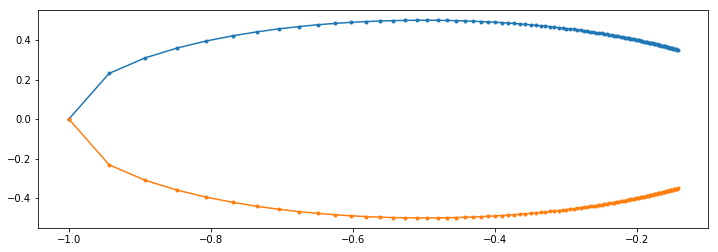

In [21]:
plt.figure(figsize=(12,4))
plt.plot(np.real(Ps[0]), np.imag(Ps[0]), '.-')
plt.plot(np.real(Ps[1]), np.imag(Ps[1]), '.-')


for i in range(0,p_num,10):
    print('For b=={0:.2f} P==({1:.2f}, {2:.2f})'.format(vs[i], 
                                                      Ps[0, i].real, Ps[0, i].imag))

plt.show()

### Проверьте, какова будет реакция системы, если подать конечный сигнал на неё при параметре, делающем её неустойчивой.

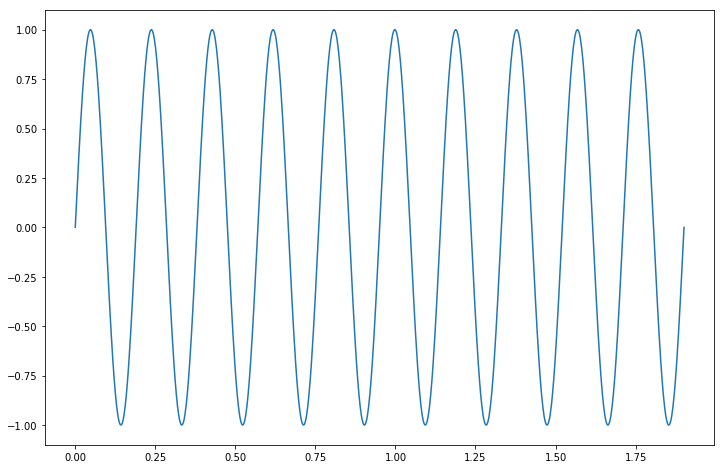

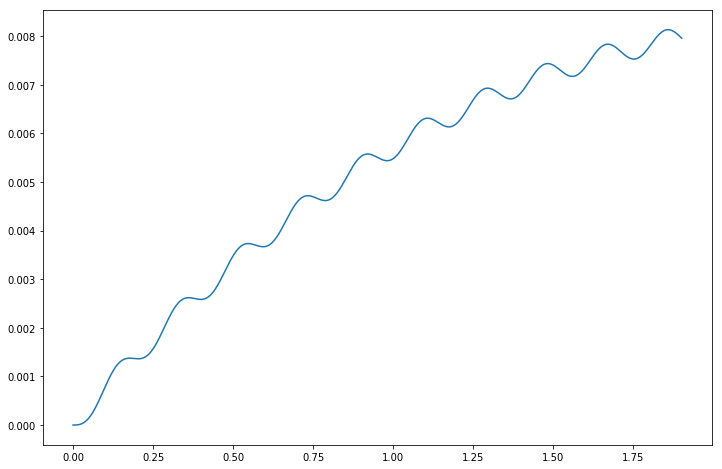

In [22]:
b = 1
freq = 5.26
T = np.linspace(0, 10.0/freq, 1001)
S = [math.sin(t*2*math.pi*freq) for t in T]

Tout, yout, xout = signal.lsim(transfer_function, S, T)
plt.figure(figsize=(12,8))
plt.plot(T, S)
plt.figure(figsize=(12,8))
plt.plot(Tout, yout)
#plt.title('Output signal.')
plt.show()

### Постройте графики АЧХ и ФЧХ для двух систем, описанных в пункте выше. 

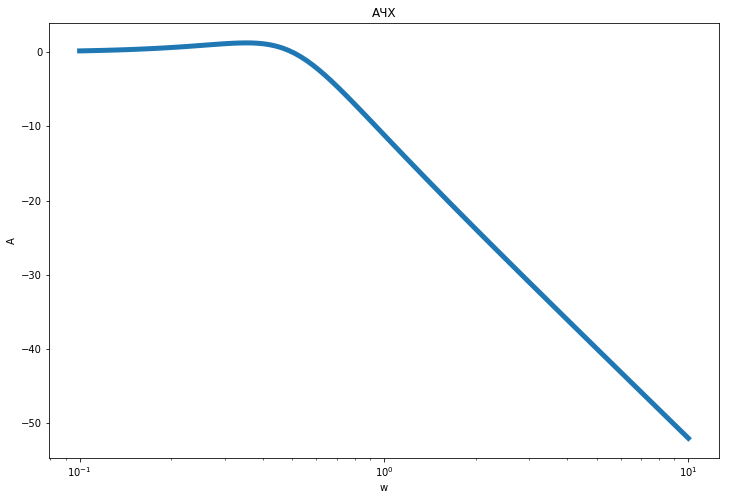

In [23]:
W, mag, phase = signal.bode(transfer_function)
plt.figure(figsize=(12,8))
plt.xlabel('w')
plt.ylabel('A')
plt.title('АЧХ')
plt.semilogx(W, mag, linewidth=5)

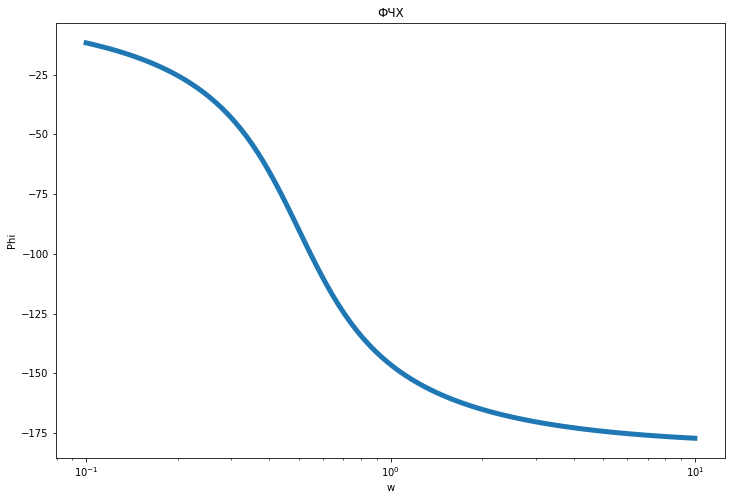

In [24]:
plt.figure(figsize=(12,8))
plt.title('ФЧХ')
plt.xlabel('w')
plt.ylabel('Phi')
plt.semilogx(W, phase, linewidth=5)
plt.show()

### W1(s) = W(s) / (1 + W(s) * R(s))
### Пусть R(s) = 1
### (c/(1+as+bs^2))/(1+(c/(1+as+bs^2)

In [25]:
#с = 1
transfer_function = signal.lti([c], [b, a, 1 + c])
transfer_function

TransferFunction(
array([1.]),
array([1., 2., 2.])
)

In [26]:
p_num = 101
vs = np.linspace(1, 7, p_num)

Ps = []
#Ps = np.empty(p_num)
for i in range(p_num):
    # рассчитываем нули, полюсы и усиление для проверяемой системы
    z, p, k = signal.tf2zpk([c], [vs[i], a, 1 + c])
    Ps.append(p)
    #Ps[i] = p[0]
    
Ps = np.asanyarray(Ps).transpose() # Транспонируем array для удобства построения графика
#Ps

For b==1.00 P==(-1.00, 1.00)
For b==1.60 P==(-0.62, 0.93)
For b==2.20 P==(-0.45, 0.84)
For b==2.80 P==(-0.36, 0.77)
For b==3.40 P==(-0.29, 0.71)
For b==4.00 P==(-0.25, 0.66)
For b==4.60 P==(-0.22, 0.62)
For b==5.20 P==(-0.19, 0.59)
For b==5.80 P==(-0.17, 0.56)
For b==6.40 P==(-0.16, 0.54)
For b==7.00 P==(-0.14, 0.52)


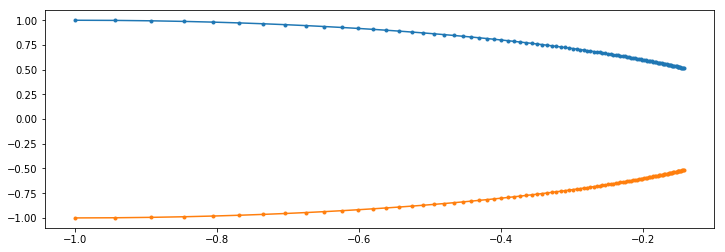

In [27]:
plt.figure(figsize=(12,4))
plt.plot(np.real(Ps[0]), np.imag(Ps[0]), '.-')
plt.plot(np.real(Ps[1]), np.imag(Ps[1]), '.-')


for i in range(0,p_num,10):
    print('For b=={0:.2f} P==({1:.2f}, {2:.2f})'.format(vs[i], 
                                                      Ps[0, i].real, Ps[0, i].imag))

plt.show()

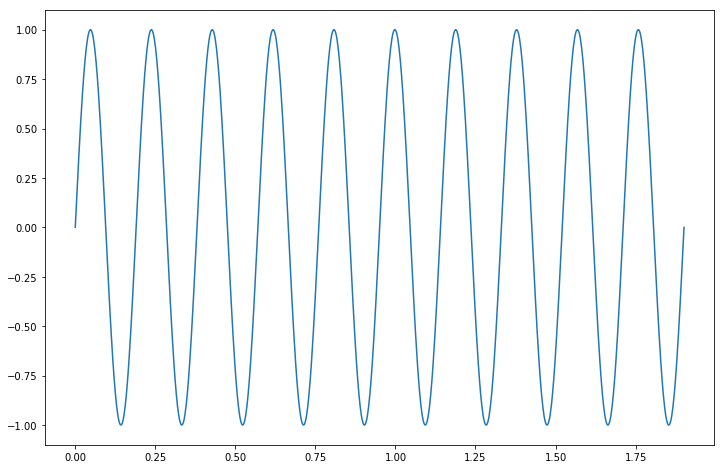

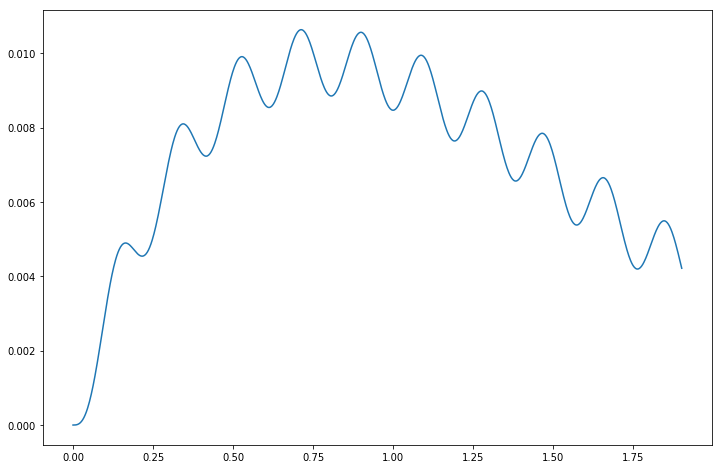

In [28]:
freq = 5.26
T = np.linspace(0, 10.0/freq, 1001)
S = [math.sin(t*2*math.pi*freq) for t in T]

Tout, yout, xout = signal.lsim(transfer_function, S, T)
plt.figure(figsize=(12,8))
plt.plot(T, S)
plt.figure(figsize=(12,8))
plt.plot(Tout, yout)
#plt.title('Output signal.')
plt.show()

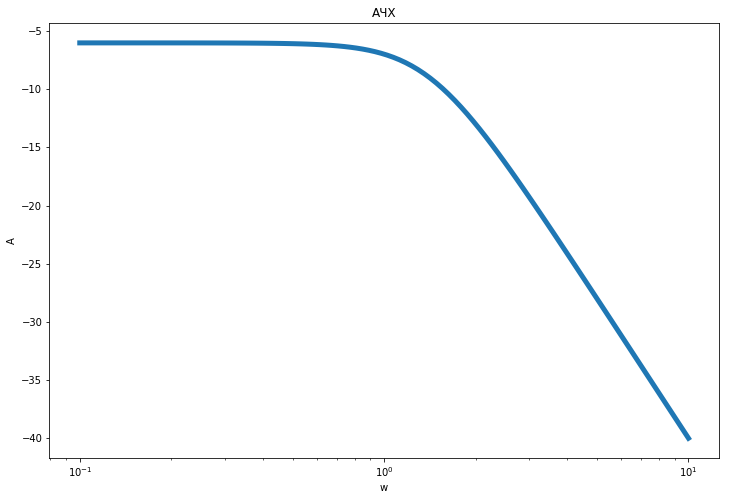

In [29]:
W, mag, phase = signal.bode(transfer_function)
plt.figure(figsize=(12,8))
plt.xlabel('w')
plt.ylabel('A')
plt.title('АЧХ')
plt.semilogx(W, mag, linewidth=5)

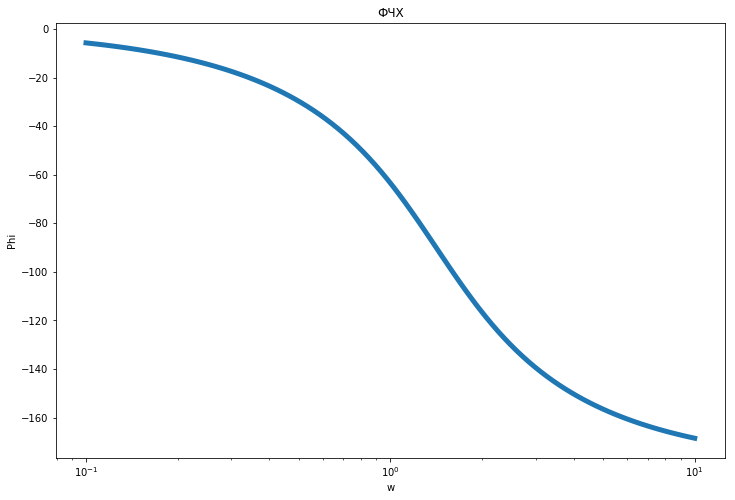

In [30]:
plt.figure(figsize=(12,8))
plt.title('ФЧХ')
plt.xlabel('w')
plt.ylabel('Phi')
plt.semilogx(W, phase, linewidth=5)
plt.show()